In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
tha = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tha--age--gender--year.csv")
jpa = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv")
alb = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-alb--age--gender--year.csv")
ttp = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-tto--age--gender--year.csv")
twn = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-twn--age--gender--year.csv")

countries = pd.concat([tha, jpa, alb, ttp, twn])
countries['country'] = countries['country'].replace({'jpn': 'Japan', 'twn': 'Taiwan', 'tha': 'Thailand', 'alb': 'Albania', 'tto': 'Trinidad and Tobago'})


## Part 1: Matplotlib

### Question 1:

In [71]:
yearly_total = countries.groupby(['country','year'])['population'].sum().reset_index()

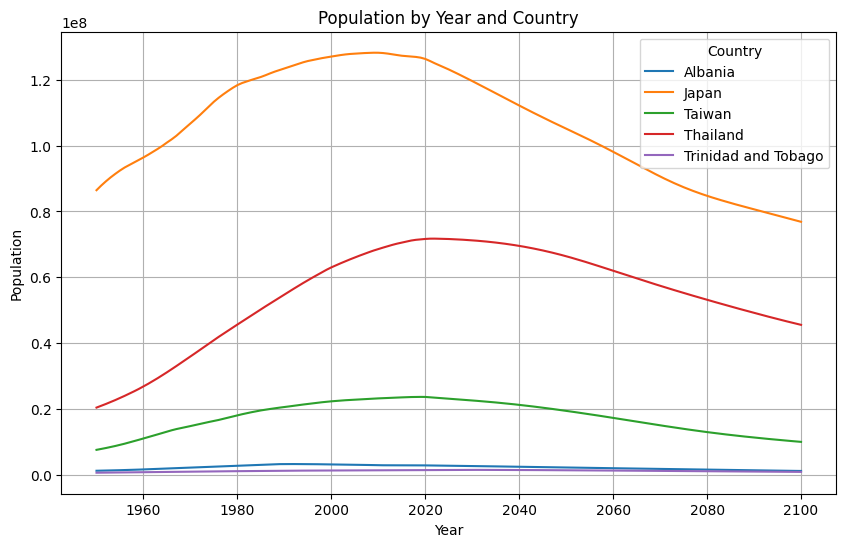

In [72]:
plt.figure(figsize=(10, 6))

for country, group in yearly_total.groupby('country'):
    plt.plot(group['year'], group['population'], label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Year and Country')
plt.legend(title='Country')
plt.grid() 
plt.show()

### Question 2:

In [73]:
years_needed = countries[countries['year'].isin([1950, 1985, 2020])]
age_groups = {
    '0-14' : (0, 14),
    '15-30' : (15, 30),
    '31-45' : (31, 45),
    '46-65' : (46, 65),
    '66+' : (66, 150)
}

def age_categories(age):
    for group, (age_min, age_max) in age_groups.items():
        if age_min <= age <= age_max:
            return group
    return None

years_needed['age_group'] = years_needed['age'].apply(age_categories)

years_needed_total = years_needed.groupby(['country','year','age_group'])['population'].sum().reset_index()

population_by_age_group = years_needed_total.pivot_table(
    index='year', columns='age_group', values='population', aggfunc='sum'
)

# percents for each age group
percents = population_by_age_group.div(population_by_age_group.sum(axis=1), axis=0) * 100


/tmp/ipykernel_290959/2165660811.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_needed['age_group'] = years_needed['age'].apply(age_categories)


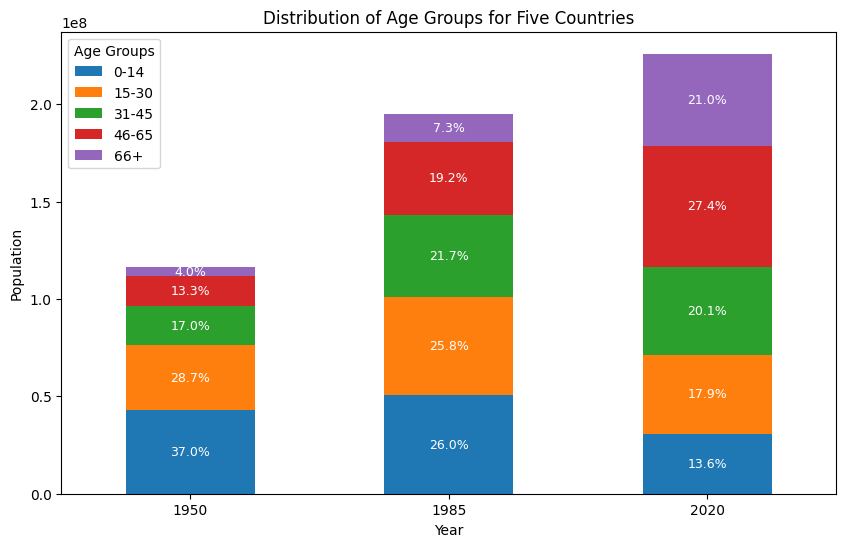

In [74]:
ax = population_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6))

for i in range(len(percents)):
    for j in range(len(percents.columns)):
        ax.text(i, population_by_age_group.iloc[i, :j+1].sum() - population_by_age_group.iloc[i, j] / 2, 
                f"{percents.iloc[i, j]:.1f}%", 
                ha='center', va='center', color='white', fontsize=9)

plt.title('Distribution of Age Groups for Five Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=0)
plt.legend(title='Age Groups')

plt.show()


## Part 2: Seaborn

### Question 1:

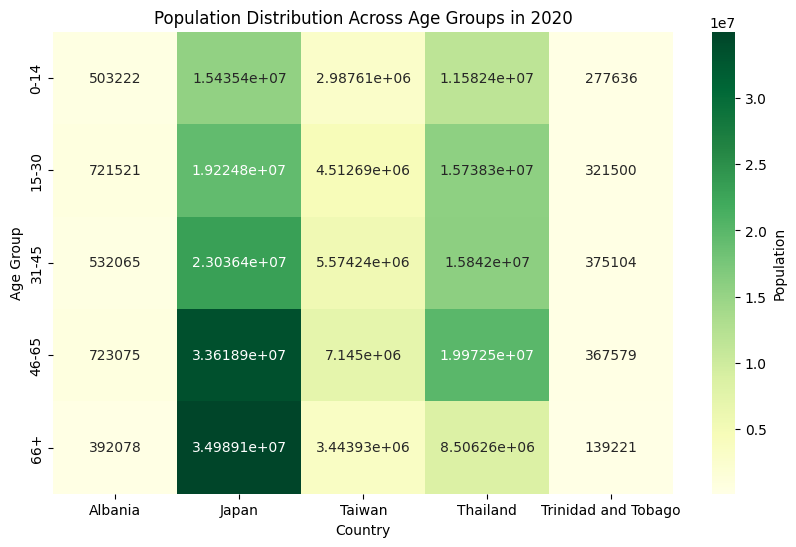

In [75]:
countries_2020 = years_needed_total[years_needed_total['year'] == 2020]

countries_2020 = countries_2020.pivot_table(index='age_group', columns='country', values='population', 
                                            aggfunc='sum', fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(countries_2020, annot=True, fmt='g', cmap='YlGn', cbar_kws={'label': 'Population'})
plt.title('Population Distribution Across Age Groups in 2020')
plt.xlabel('Country')
plt.ylabel('Age Group')

plt.show()


This heatmap of the distribution of the age groups across five countries reveals that Japan's oldest ages groups are the most similar in population and are the greatest in number in the country. The countries of Trinidad and Tobago and Albania both have lower populations that are evenly distributed among the age groups. The population in Thailand increases with the age groups until 66+ indicating less of the elderly. Taiwan follows a similar pattern as Thailand but it is less pronounced due to the small size of the overall population. 

### Question 2

In [76]:
two_countries = ['Taiwan', 'Thailand']  
countries_2020 = countries[(countries['year'] == 2020) & (countries['country'].isin(two_countries))]  

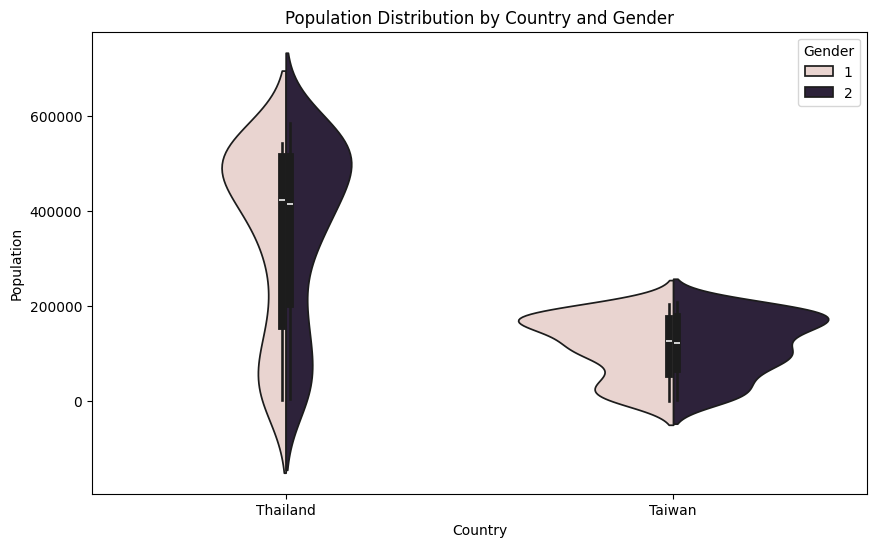

In [77]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='country', y='population', hue='gender', data=countries_2020, split=True)

plt.title("Population Distribution by Country and Gender")
plt.xlabel("Country")
plt.ylabel("Population")
plt.legend(title="Gender")
plt.show()

These violin plots of the distribution of age between Thailand and Taiwan split by gender reveals that in Thailand, there are around 500,000 people in most age groups. In Taiwan, overall, the population is smaller and there are around 200,000 people in most age groups. In both countries, the ratio of men and women are approximately the same but there appears to be slightly more women in Taiwan.

### Question 3

In [78]:
selected_countries = ['Taiwan', 'Thailand', 'Japan', 'Albania']  
four_countries = countries[countries['country'].isin(selected_countries)]


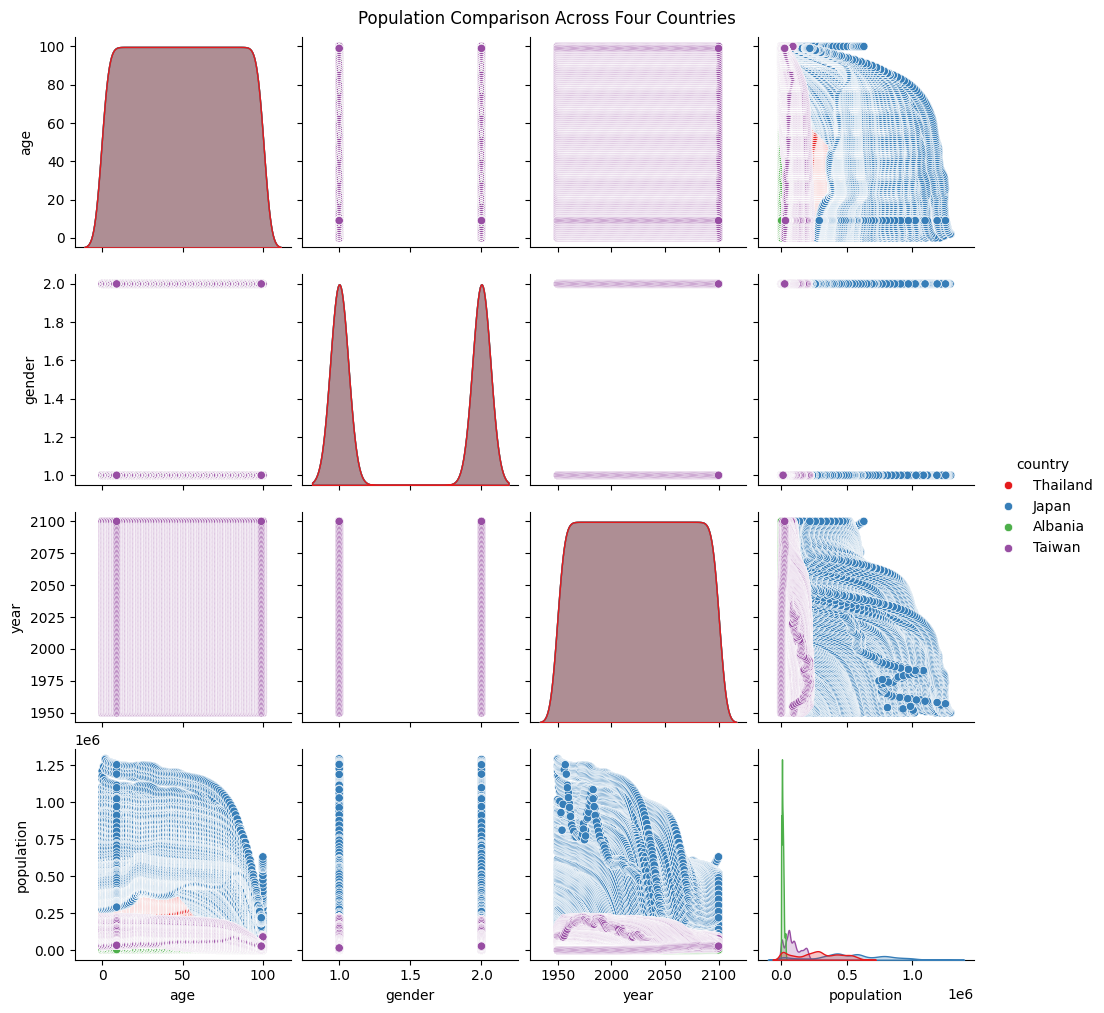

In [79]:
sns.pairplot(four_countries, hue='country', palette='Set1', diag_kind='kde')

plt.suptitle("Population Comparison Across Four Countries", y = 1.01)
plt.show()

From the pairplot, we see some trends in the country population data. For instance, the plot of age vs population reveals a steep decline in the number of elderly people except for age 100. This is likely due to an age cap on the data. Looking at the year vs population plot g=reveals that Japan's population is declining while the other countries are growing. 